In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px

In [2]:
# lendo data

data = pd.read_csv(r'C:\Users\Thiag\Documents\Data_analytics\Projetos Data\Projetos\project_enem\data\processed\02_feature-engineering_data.csv',
            encoding='utf-8',
            index_col='NU_INSCRICAO'
            )

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
map_colums = {
    'escolaridade_pai'          :'q01_escolaridade_pai',
    'escolaridade_mae'          :'q02_escolaridade_mae',
    'ocupacao_pai'              :'q03_ocupacao_pai',
    'ocupacao_mae'              :'q04_ocupacao_mae',
    'pessoas_residencia'        :'q05_pessoas_residencia',
    'renda_familiar'            :'q06_renda_familiar',
    'empregado_domestico'       :'q07_empregado_domestico',
    'tem_banheiro'              :'q08_tem_banheiro',
    'qtd_quartos'               :'q09_qtd_quartos',
    'tem_carro'                 :'q10_tem_carro',
    'tem_motocicleta'           :'q11_tem_motocicleta',
    'tem_geladeira'             :'q12_tem_geladeira',
    'tem_freezer'               :'q13_tem_freezer',
    'tem_maquina_lavar_roupa'   :'q14_tem_maquina_lavar_roupa',
    'tem_maquina_secar_roupa'   :'q15_tem_maquina_secar_roupa',
    'tem_microondas'            :'q16_tem_microondas',
    'tem_maquina_lavar_louca'   :'q17_tem_maquina_lavar_louca',
    'tem_aspirador_po'          :'q18_tem_aspirador_po',
    'tem_tv_cores'              :'q19_tem_tv_cores',
    'tem_dvd'                   :'q20_tem_dvd',
    'tem_tv_assinatura'         :'q21_tem_tv_assinatura',
    'tem_celular'               :'q22_tem_celular',
    'tem_telefone_fixo'         :'q23_tem_telefone_fixo',
    'tem_computador'            :'q24_tem_computador',
    'tem_internet'              :'q25_tem_internet'
}
data = data.rename(columns=map_colums)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2678264 entries, 210061103945 to 210061932304
Data columns (total 56 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   tipo_faixa_etaria             int64  
 1   tipo_sexo                     object 
 2   tipo_estado_civil             int64  
 3   tipo_cor_raca                 object 
 4   tipo_nacionalidade            object 
 5   tipo_conclusao                int64  
 6   ano_de_concusao               int64  
 7   tipo_escola                   object 
 8   tipo_treineiro                object 
 9   regiao                        object 
 10  uf_prova                      object 
 11  municipio_prova               object 
 12  q01_escolaridade_pai          float64
 13  q02_escolaridade_mae          float64
 14  q03_ocupacao_pai              object 
 15  q04_ocupacao_mae              object 
 16  q05_pessoas_residencia        int64  
 17  q06_renda_familiar            int64  
 18  q07_emprega

In [6]:
data.shape

(2678264, 56)

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tipo_faixa_etaria,2678264.00,4.39,3.50,1.00,2.00,3.00,5.00,20.00
tipo_estado_civil,2678264.00,1.03,0.37,0.00,1.00,1.00,1.00,4.00
tipo_conclusao,2678264.00,3.01,0.91,1.00,2.00,3.00,4.00,4.00
ano_de_concusao,2678264.00,1.90,3.93,0.00,0.00,0.00,2.00,17.00
q01_escolaridade_pai,2428653.00,3.23,1.64,0.00,2.00,4.00,4.00,6.00
q02_escolaridade_mae,2600823.00,3.68,1.56,0.00,3.00,4.00,5.00,6.00
q05_pessoas_residencia,2678264.00,3.73,1.34,1.00,3.00,4.00,4.00,20.00
q06_renda_familiar,2678264.00,3.86,3.73,0.00,1.00,2.00,6.00,16.00
q07_empregado_domestico,2678264.00,0.16,0.58,0.00,0.00,0.00,0.00,3.00
q08_tem_banheiro,2678264.00,1.52,0.83,0.00,1.00,1.00,2.00,4.00


In [8]:
data.head(10)

,tipo_faixa_etaria,tipo_sexo,tipo_estado_civil,tipo_cor_raca,tipo_nacionalidade,tipo_conclusao,ano_de_concusao,tipo_escola,tipo_treineiro,regiao,uf_prova,municipio_prova,q01_escolaridade_pai,q02_escolaridade_mae,q03_ocupacao_pai,q04_ocupacao_mae,q05_pessoas_residencia,q06_renda_familiar,q07_empregado_domestico,q08_tem_banheiro,q09_qtd_quartos,q10_tem_carro,q11_tem_motocicleta,q12_tem_geladeira,q13_tem_freezer,q14_tem_maquina_lavar_roupa,q15_tem_maquina_secar_roupa,q17_tem_maquina_lavar_louca,q16_tem_microondas,q18_tem_aspirador_po,q19_tem_tv_cores,q20_tem_dvd,q21_tem_tv_assinatura,q23_tem_telefone_fixo,q22_tem_celular,q24_tem_computador,q25_tem_internet,indice_tecnologico,indice_eletrodomesticos,indice_transporte,indice_estrutura_casa,indice_escolaridade_pais,indice_max_escolaridade_pais,lingua_estrangeira,status_redacao,nota_cn,nota_ch,nota_lc,nota_mt,nota_red_comp1,nota_red_comp2,nota_red_comp3,nota_red_comp4,nota_red_comp5,nota_redacao,nota_media_geral
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
210061103945,6,Feminino,1,Branca,Brasileiro(a),4,0,Não Respondeu,Não é treineiro,Sul,RS,Caxias do Sul,NaN,4.00,C,F,5,2,0,1,3,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,2,3,1,4,4.00,4.00,Espanhol,Sem problemas,502.00,498.90,475.60,363.20,140.00,200.00,100.00,120.00,140.00,700.00,459.90
210060214087,2,Feminino,1,Parda,Brasileiro(a),2,0,Pública,Não é treineiro,Nordeste,CE,Fortaleza,3.00,3.00,B,B,5,2,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,3,0,1,5,1,0,2,6.00,3.00,Inglês,Sem problemas,459.00,508.50,507.20,466.70,140.00,200.00,160.00,180.00,200.00,880.00,485.40
210059980948,3,Feminino,1,Parda,Brasileiro(a),2,0,Pública,Não é treineiro,Nordeste,CE,Quixadá,1.00,1.00,A,A,4,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,1,0,1,2.00,1.00,Inglês,Sem problemas,402.50,379.20,446.90,338.30,120.00,120.00,120.00,120.00,80.00,560.00,391.70
210060801601,11,Masculino,1,Branca,Brasileiro(a),4,8,Não Respondeu,Não é treineiro,Sudeste,SP,Batatais,NaN,4.00,F,D,2,5,0,1,2,1,1,1,1,1,0,0,1,1,2,1,0,0,2,1,1,7,5,2,3,4.00,4.00,Inglês,Sem problemas,564.70,630.30,610.40,680.20,120.00,120.00,120.00,120.00,120.00,600.00,621.40
210059085130,8,Masculino,1,Parda,Brasileiro(a),4,5,Não Respondeu,Não é treineiro,Nordeste,RN,Natal,5.00,2.00,D,B,4,1,0,2,2,0,0,1,0,1,0,0,1,1,1,0,0,0,4,1,1,7,4,0,4,7.00,5.00,Inglês,Sem problemas,644.90,620.20,626.90,736.30,140.00,200.00,160.00,160.00,200.00,860.00,657.10
210060801595,3,Masculino,1,Parda,"Brasileiro(a) Nato(a), nascido(a) no exterior",2,0,Pública,Não é treineiro,Sul,PR,Ubiratã,3.00,4.00,A,B,5,3,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,4,2,1,2,7.00,4.00,Inglês,Sem problemas,608.20,667.60,607.90,691.90,140.00,180.00,120.00,160.00,180.00,780.00,643.90
210060214081,3,Feminino,1,Branca,Brasileiro(a),4,1,Não Respondeu,Não é treineiro,Sudeste,SP,São Paulo,4.00,4.00,B,B,3,2,0,1,2,1,0,1,1,1,0,0,1,0,1,0,0,0,2,1,1,5,4,1,3,8.00,4.00,Inglês,Sem problemas,626.50,604.90,614.30,548.80,140.00,200.00,160.00,180.00,120.00,800.00,598.60
210059388087,11,Feminino,1,Preta,Brasileiro(a),4,7,Não Respondeu,Não é treineiro,Nordeste,PE,Recife,NaN,0.00,F,A,3,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,1,4,1,0,3,0.00,0.00,Espanhol,Sem problemas,547.20,623.30,593.70,404.60,120.00,120.00,100.00,100.00,120.00,560.00,542.20
210059980942,7,Feminino,1,Parda,Brasileiro(a),4,4,Não Respondeu,Não é treineiro,Nordeste,RN,Caraúbas,1.00,1.00,A,A,5,0,0,1,2,1,1,1,0,0,0,0,0,0,1,0,0,0,3,1,1,6,1,2,3,2.00,1.00,Espanhol,Sem problemas,510.80,313.40,388.50,415.60,120.00,120.00,100.00,120.00,100.00,560.00,407.10


*Análise Univariada Representatividade - Respresentatividade*


📈 DESEMPENHO (obrigatórias - 6 colunas)

nota_cn, nota_ch, nota_lc, nota_mt
nota_redacao, nota_media_geral

👤 PERFIL DEMOGRÁFICO (essenciais - 4 colunas)

tipo_sexo, tipo_cor_raca, regiao, tipo_faixa_etaria

🏫 CONTEXTO EDUCACIONAL (importantes - 3 colunas)

tipo_escola, tipo_treineiro, tipo_conclusao

💰 SOCIOECONÔMICO (principais - 4 colunas)

q06_renda_familiar, indice_escolaridade_pais
indice_tecnologico, indice_estrutura_casa

📍 GEOGRÁFICO (se relevante - 2 colunas)

In [9]:
sns.set_style("whitegrid")      # Estilo: whitegrid, darkgrid, white, dark, ticks
sns.set_palette("husl")         # Paleta de cores
sns.set_context("notebook")     # Contexto: paper, notebook, talk, poster

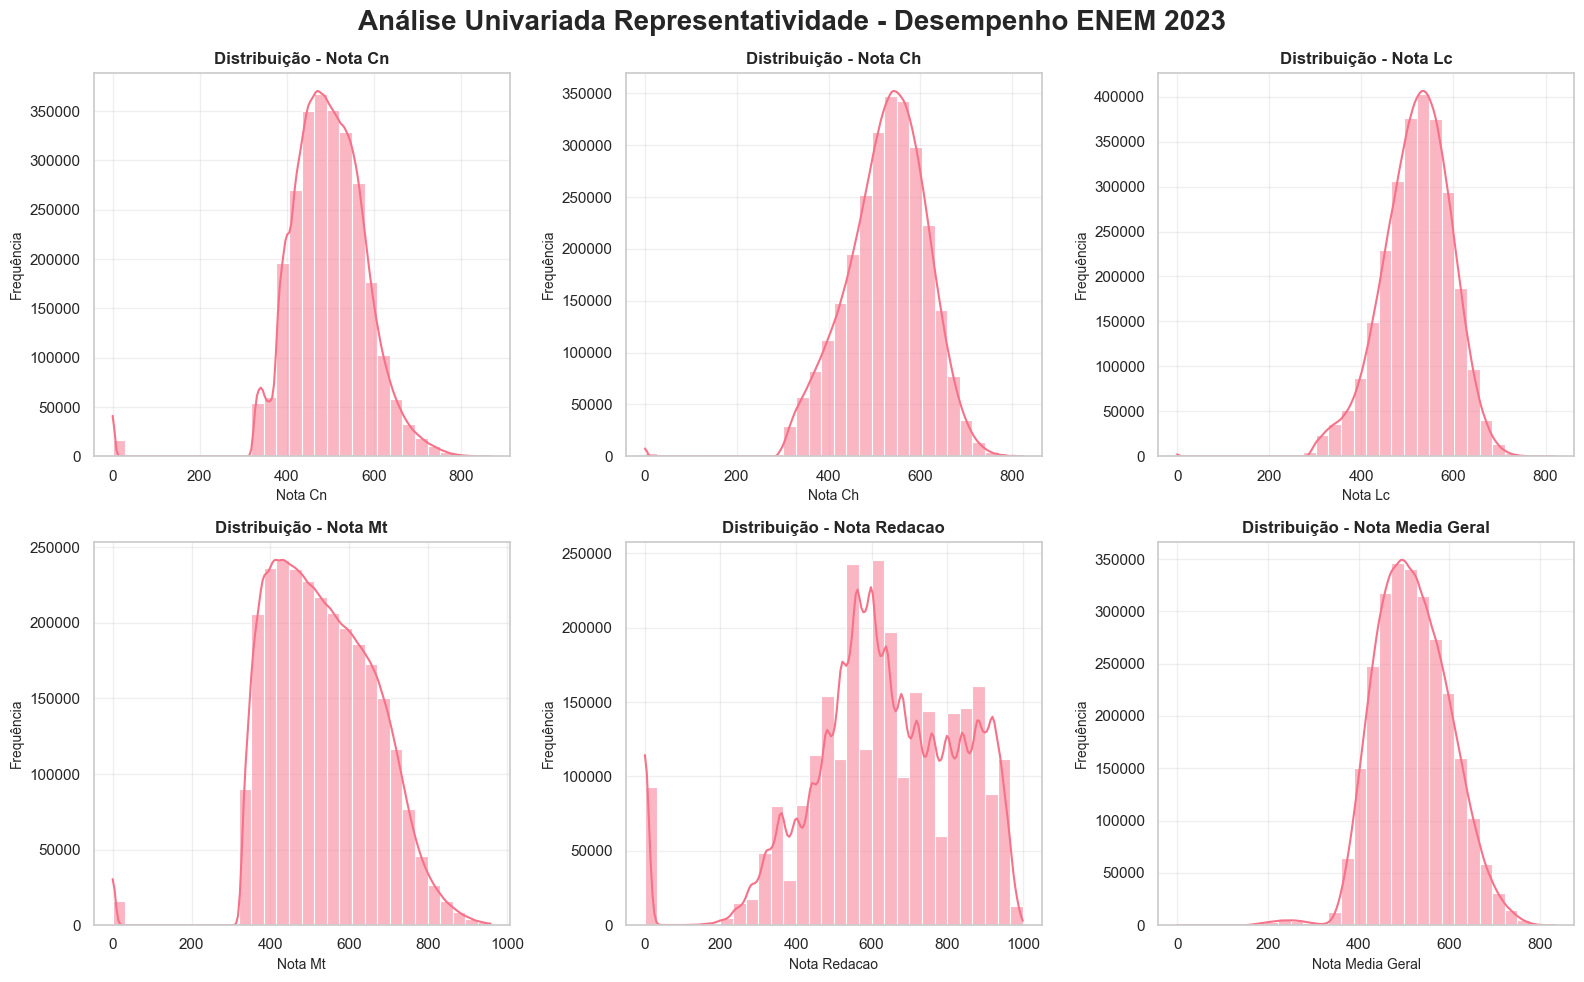

In [10]:
# Analise Univariada Desempenho 2023
col_desepenho = ['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao', 'nota_media_geral']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Análise Univariada Representatividade - Desempenho ENEM 2023', fontsize=20, fontweight='bold', y=0.98)

axes = axes.ravel() # .ravel transforma o axes que é 2d e 1d: ([0,0],[0,1] para 1,2,3)

for i, col in enumerate(col_desepenho):
    sns.histplot(data=data, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribuição - {col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=10)
    axes[i].set_ylabel('Frequência', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [11]:
data[col_desepenho].describe().transpose()[['count', 'std', 'min', '25%', '50%', 'mean', '75%', 'max']]

,count,std,min,25%,50%,mean,75%,max
nota_cn,2678264.00,87.78,0.00,440.60,494.00,495.91,551.30,868.40
nota_ch,2678264.00,86.81,0.00,471.20,532.90,526.20,586.90,823.00
nota_lc,2678264.00,74.12,0.00,473.70,524.90,520.30,571.80,820.80
nota_mt,2678264.00,131.53,0.00,431.40,523.80,534.03,630.30,958.60
nota_redacao,2678264.00,209.03,0.00,520.00,620.00,626.60,780.00,1000.00
nota_media_geral,2678264.00,81.91,0.00,460.30,514.70,519.11,575.00,833.20


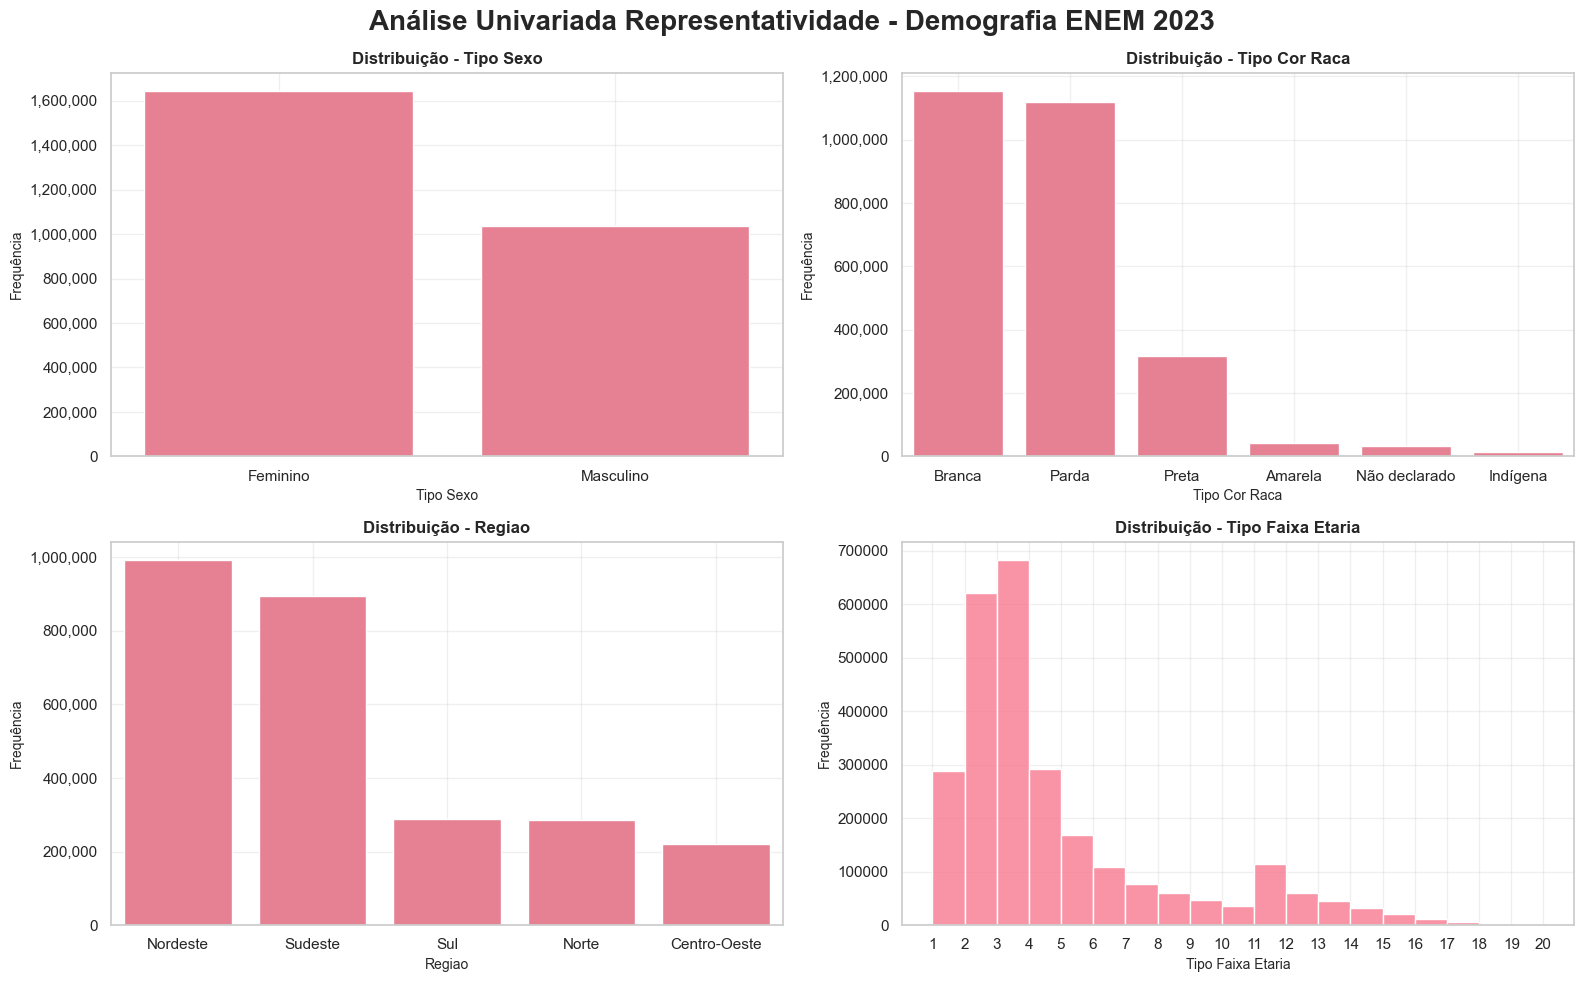

In [12]:
# Analise Univariada Demografia 2023
col_demografia = ['tipo_sexo', 'tipo_cor_raca', 'regiao', 'tipo_faixa_etaria']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análise Univariada Representatividade - Demografia ENEM 2023', fontsize=20, fontweight='bold', y=0.98)

axes = axes.ravel() # .ravel transforma o axes que é 2d e 1d: ([0,0],[0,1] para 1,2,3)

for i, col in enumerate(['tipo_sexo', 'tipo_cor_raca', 'regiao']):

    order = data[col].value_counts().index

    sns.countplot(data=data, x=col, ax=axes[i], order=order)
    axes[i].set_title(f'Distribuição - {col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=10)
    axes[i].set_ylabel('Frequência', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x):,}'))

sns.histplot(
    data=data,
    x='tipo_faixa_etaria',
    bins=np.arange(data['tipo_faixa_etaria'].min(), data['tipo_faixa_etaria'].max() + 1, 1),
     ax=axes[3]
    )

# Configurando o último gráfico
axes[3].set_title('Distribuição - Tipo Faixa Etaria', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Tipo Faixa Etaria', fontsize=10)
axes[3].set_ylabel('Frequência', fontsize=10)
axes[3].grid(True, alpha=0.3)
axes[3].set_xticks(range(int(data['tipo_faixa_etaria'].min()), int(data['tipo_faixa_etaria'].max()) + 1, 1)) # ajustando manualmente o rotulo do eixo x

plt.tight_layout()
plt.show()

In [13]:
col_demografia = ['tipo_sexo', 'tipo_cor_raca', 'regiao', 'tipo_faixa_etaria']
data[col_demografia].describe().transpose()[['count', 'std', 'min', '25%', '50%', 'mean', '75%', 'max']]

,count,std,min,25%,50%,mean,75%,max
tipo_faixa_etaria,2678264.00,3.50,1.00,2.00,3.00,4.39,5.00,20.00


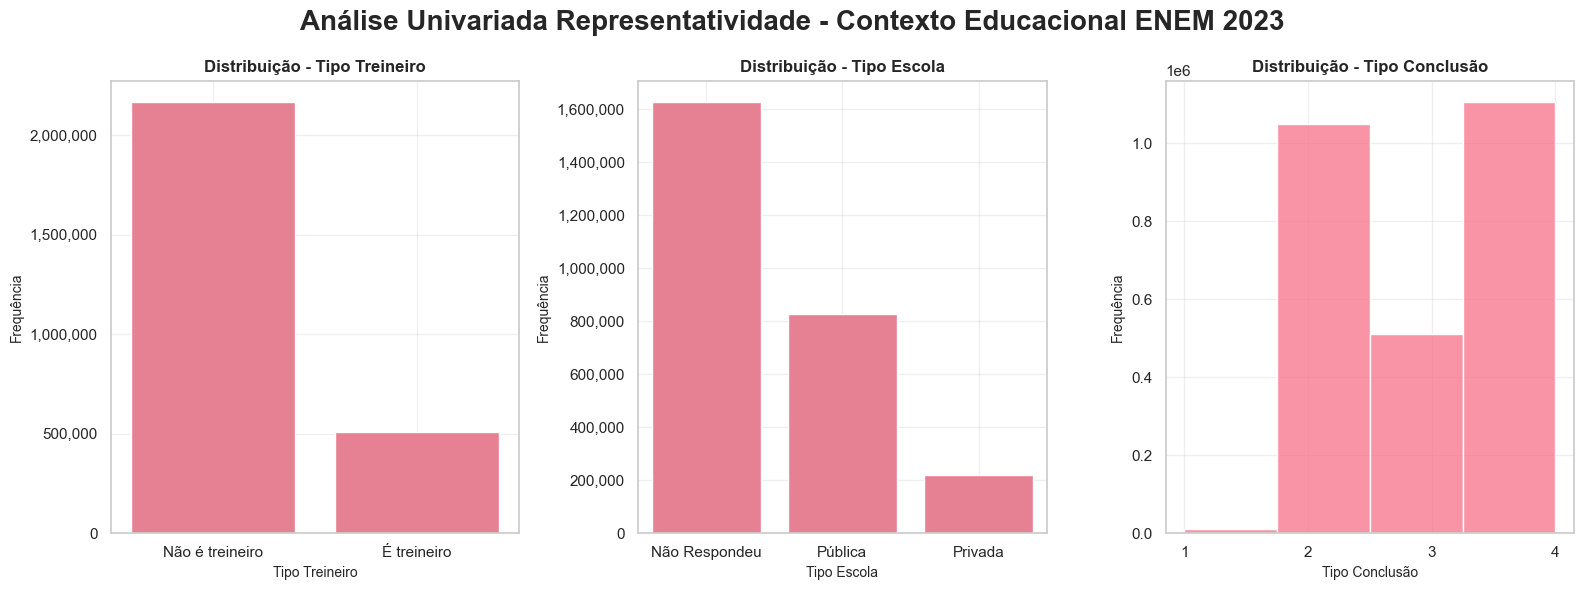

In [14]:
# Analise univariade ddo contexto educacional
col_educacional = ['tipo_escola', 'tipo_treineiro', 'tipo_conclusao']

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Análise Univariada Representatividade - Contexto Educacional ENEM 2023', fontsize=20, fontweight='bold', y=0.98)

axes = axes.ravel() # .ravel transforma o axes que é 2d e 1d: ([0,0],[0,1] para 1,2,3)

for i, col in enumerate(['tipo_treineiro', 'tipo_escola']):

    order = data[col].value_counts().index

    sns.countplot(data=data, x=col, ax=axes[i], order=order)
    axes[i].set_title(f'Distribuição - {col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=10)
    axes[i].set_ylabel('Frequência', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x):,}'))

sns.histplot(
    data=data,
    x='tipo_conclusao',
    bins=4,
    ax=axes[2]
    )

# Configurando o último gráfico
axes[2].set_title('Distribuição - Tipo Conclusão', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Tipo Conclusão', fontsize=10)
axes[2].set_ylabel('Frequência', fontsize=10)
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(range(int(data['tipo_conclusao'].min()), int(data['tipo_conclusao'].max()) + 1, 1)) # ajustando manualmente o rotulo do eixo x

plt.tight_layout()
plt.show()

In [15]:
data[col_educacional].describe().transpose()[['count', 'std', 'min', '25%', '50%', 'mean', '75%', 'max']]

,count,std,min,25%,50%,mean,75%,max
tipo_conclusao,2678264.00,0.91,1.00,2.00,3.00,3.01,4.00,4.00


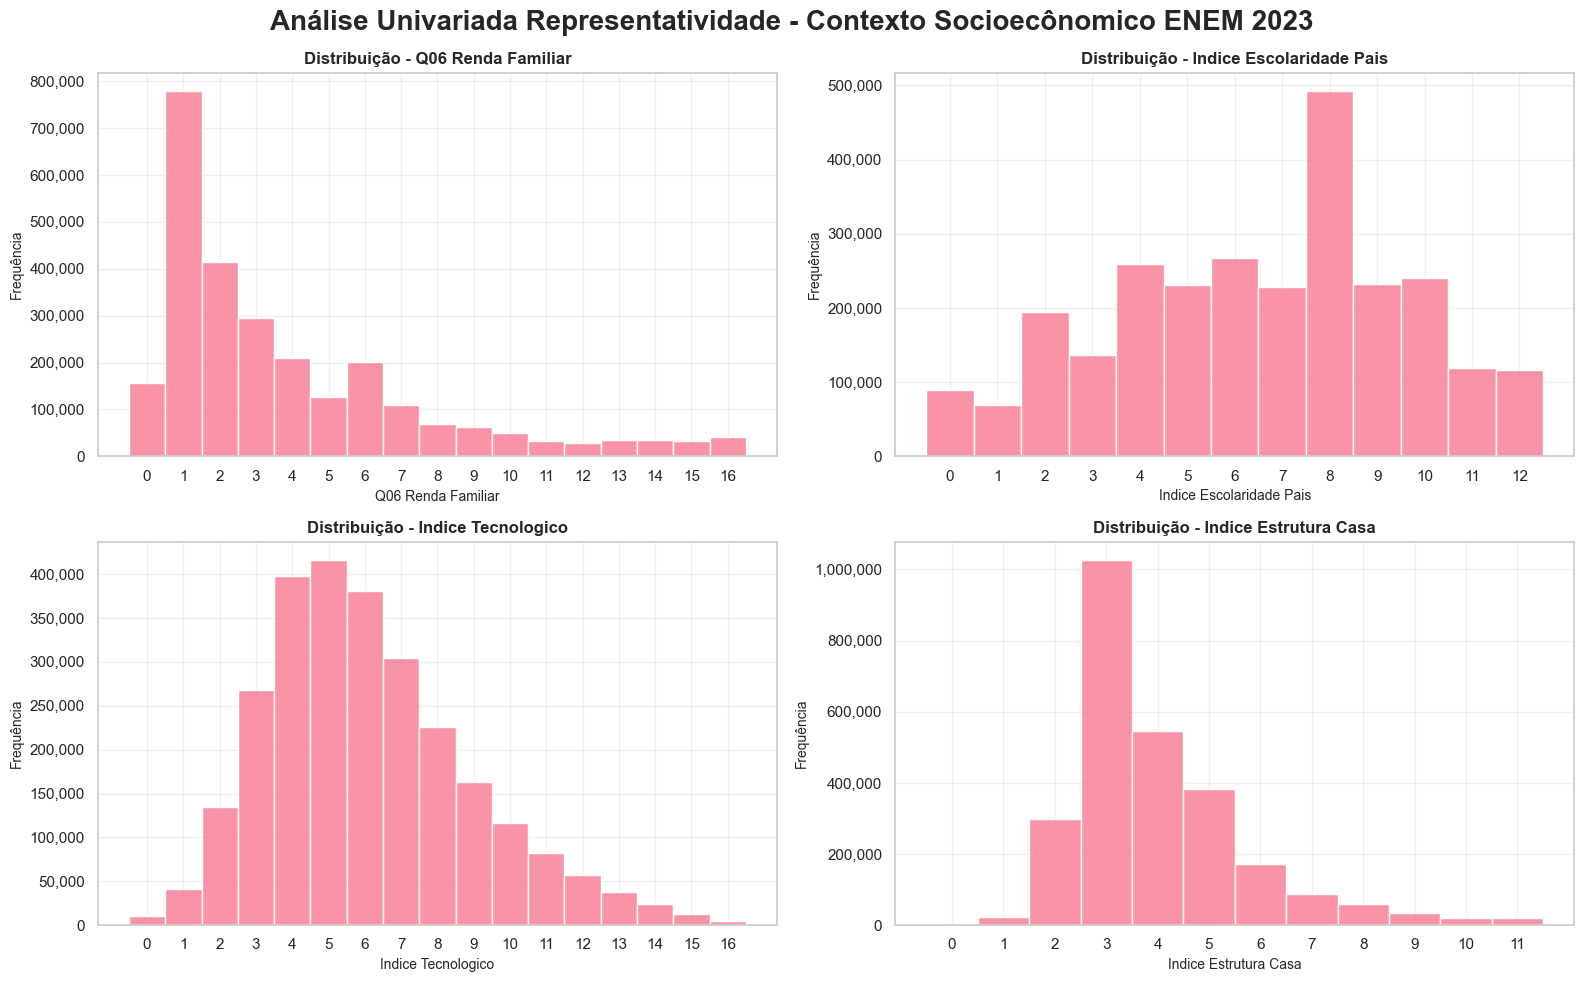

In [16]:
# Analise univariade ddo contexto socioeconomico
col_socioeconomico = ['q06_renda_familiar', 'indice_escolaridade_pais', 'indice_tecnologico', 'indice_estrutura_casa']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análise Univariada Representatividade - Contexto Socioecônomico ENEM 2023', fontsize=20, fontweight='bold', y=0.98)

axes = axes.ravel() # .ravel transforma o axes que é 2d e 1d: ([0,0],[0,1] para 1,2,3)

for i, col in enumerate(col_socioeconomico):
    sns.histplot(data=data, x=col, ax=axes[i], discrete=True, bins=np.arange(data[col].min(), data[col].max()+ 1,1))
    axes[i].set_title(f'Distribuição - {col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=10)
    axes[i].set_ylabel('Frequência', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xticks(range(int(data[col].min()), int(data[col].max()) + 1, 1)) # ajustando manualmente o rotulo do eixo x
    axes[i].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

In [17]:
data[col_socioeconomico].describe().transpose()[['count', 'std', 'min', '25%', '50%', 'mean', '75%', 'max']]

,count,std,min,25%,50%,mean,75%,max
q06_renda_familiar,2678264.00,3.73,0.00,1.00,2.00,3.86,6.00,16.00
indice_escolaridade_pais,2678264.00,3.07,0.00,4.00,7.00,6.50,9.00,12.00
indice_tecnologico,2678264.00,2.83,0.00,4.00,6.00,6.10,8.00,16.00
indice_estrutura_casa,2678264.00,1.73,0.00,3.00,3.00,3.99,5.00,11.00


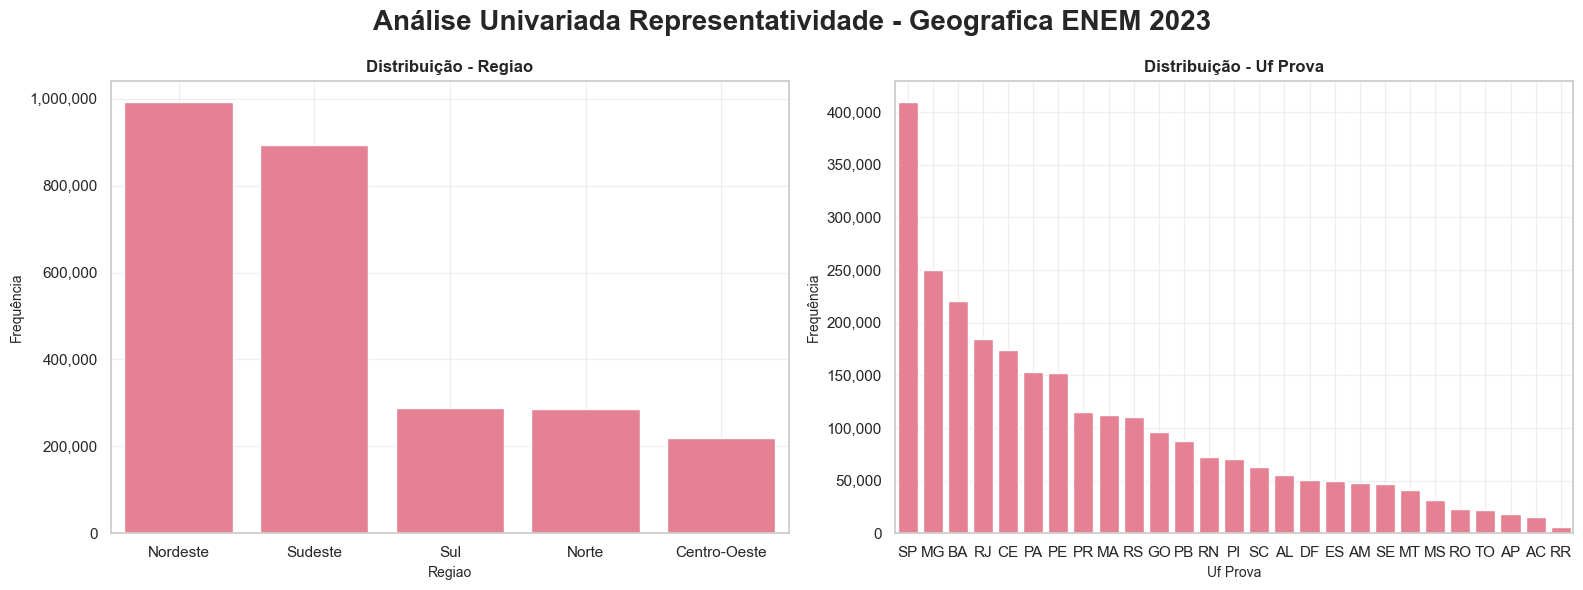

In [18]:
# Analise univariade Geografica
col_geografia = ['regiao', 'uf_prova']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análise Univariada Representatividade - Geografica ENEM 2023', fontsize=20, fontweight='bold', y=0.98)

axes = axes.ravel() # .ravel transforma o axes que é 2d e 1d: ([0,0],[0,1] para 1,2,3)

for i, col in enumerate(col_geografia):

    order = data[col].value_counts().index

    sns.countplot(data=data, x=col, ax=axes[i], order=order)
    axes[i].set_title(f'Distribuição - {col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=10)
    axes[i].set_ylabel('Frequência', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

*Análise Univariada Representatividade - Desempenho [Nota media Geral]*


👤 PERFIL DEMOGRÁFICO (essenciais - 4 colunas)
tipo_sexo, tipo_cor_raca, regiao, tipo_faixa_etaria

🏫 CONTEXTO EDUCACIONAL (importantes - 3 colunas)
tipo_escola, tipo_treineiro, tipo_conclusao

💰 SOCIOECONÔMICO (principais - 4 colunas)
q06_renda_familiar, indice_escolaridade_pais
indice_tecnologico, indice_estrutura_casa

📍 GEOGRÁFICO (se relevante - 2 colunas)
'regiao', 'uf_prova'